## EJERCIO 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# wc -l bookings.csv

In [ ]:
!ls

In [ ]:
file = '/home/dsc/Documents/Data Science Challenge/bookings.csv'
df=pd.read_csv('/home/dsc/Documents/Data Science Challenge/bookings.csv',usecols=['arr_port', 'pax', 'year'],nrows = 9999, delimiter='^')

In [ ]:
#reader = pd.read_csv('/home/dsc/Documents/Data Science Challenge/bookingsh.csv', chunksize=5, delimiter='^')

### SIN CHUNKS -  FUNCIONA

In [ ]:
#[len(x) for x in df['arr_port']] mirar len de las columnas
#df.columns=[x.replace(" ","") for x in df] # eliminar espacios de las columnas
pd.set_option('display.max_columns', None)
df = df.dropna()
df = df[df['year'] == 2013]
#df=df.groupby(['arr_port']).sum().sort_values(by='pax',ascending=False)
#df5['arr_port'] = df['arr_port'].str.replace(' ','')
#df4 = df.groupby(['arr_port']).sum(['pax'].nlargest(10).astype(int) otra forma de hacerlo
del df['year']
df.groupby('arr_port').sum().sort_values(by='pax',ascending=False)

# sin el chunk da bien.

### CON CHUNKS -  FUNCIONA

In [ ]:
import pandas as pd



pd.set_option('display.max_columns', None)
all_chunks=pd.DataFrame()
df2=pd.read_csv('/home/dsc/Documents/Data Science Challenge/bookings.csv',usecols=['arr_port', 'pax', 'year'],chunksize=1e6,delimiter='^',iterator=True)

for i,b in enumerate(df2):
    print(i, len(b))
    b=b.dropna()
    b=b[b['year'] == 2013]
    del b['year']
    result_chunk = b.groupby(['arr_port']).sum()
    all_chunks = all_chunks.append(result_chunk)

result_all = all_chunks.groupby(['arr_port']).sum().sort_values(by='pax',ascending=False)
result_all.head(10).reset_index()

In [ ]:
result_all.columns

In [ ]:

def stream_groupby_csv(path, key, agg, chunk_size=10000):

    # Tell pandas to read the data in chunks
    chunks = pd.read_csv(file,delimiter = '^',chunksize=chunk_size)

    results = []
    orphans = pd.DataFrame()

    for chunk in chunks:

        # Add the previous orphans to the chunk
        chunk = pd.concat((orphans, chunk))

        # Determine which rows are orphans
        last_val = chunk[key].iloc[-1]
        is_orphan = chunk[key] == last_val

        # Put the new orphans aside
        chunk, orphans = chunk[~is_orphan], chunk[is_orphan]

        # Perform the aggregation and store the results
        results.append(agg(chunk))

    # Don't forget the remaining orphans
    if len(orphans):
        results.append(agg(orphans))

    return pd.concat(results)
agg = lambda chunk: chunk.groupby('arr_port')[['pax']].sum().sort_values(by='pax',ascending = False).head(10)


In [ ]:
exercice2

# otra manera de hacerlo
df = pd.read_csv('bookings.csv', delimiter='^')

df['arr_port'] = df['arr_port'].str.strip()

df.groupby(['arr_port']).sum()['pax'].nlargest(10).astype(int)


In [ ]:
!ls

# EJERCICIO 2

In [ ]:
import pandas as pd

In [28]:
file2 = '/home/dsc/Documents/Data Science Challenge/searches.csv'
df=pd.read_csv(file2,nrows = 200000,delimiter='^')
pd.set_option('display.max_columns', None)
df

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2013-07-19,20:25:52,MPT,8296bd44c56615c7204c79c3b69722da,GB,LON,SEA,1,2,LON,SEA,2013-08-08,NaN,NaN,SEA,LON,2013-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BHX
199996,2013-07-19,12:54:00,FXP,8d2a1e767a6c0231e998716660848886,CA,YYC,YVR,0,2,YYC,YVR,2013-07-27,KM,J,YVR,YKA,2013-07-27,KM,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,YYZ
199997,2013-07-19,02:10:35,MPT,7a38c21600c8782a06974b1a1d9ec65f,CA,YOW,EDI,1,2,YOW,EDI,2013-07-26,KP,NaN,EDI,YOW,2013-08-06,KP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,YKX
199998,2013-07-19,07:26:48,FXP,4f8f1c3a5035723785a477af6fd6797b,LU,MAD,LUX,1,2,MAD,LUX,2013-08-21,VQ,X,LUX,MAD,2013-08-25,VQ,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LUX


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

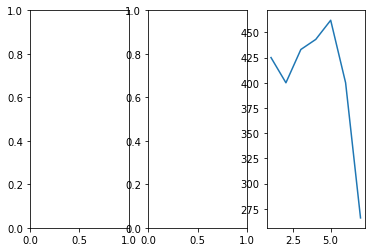

In [45]:

best_columns = [x.replace(' ',"") for x in df.columns]
#df['arr_port'] = df['arr_port'].str.replace(' ','')
df.columns = list(best_columns)
df['Date'] = pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
#df['Year']=df['Date'].dt.year

Dest = 'MAD'

#filtered_df2 = df[(df.Destination=='MAD')&(df.Destination=='APG')&(df.Destination=='BCN')]
filtered_df = df[df.Destination==(Dest)]

mad_filter =filtered_df.groupby(['Month'])['Destination'].count().reset_index()

#mad = all_filter.filter(like='MAD', axis=0)
#bcn = all_filter.filter(like='BCN', axis=0)
#apg = all_filter.filter(like='APG', axis=0)


import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3)

axes[1,0] = plt.plot(mad_filter['Month'],mad_filter['Destination'])

In [ ]:
#df=df[df['Destination']=='MAD'] 
#df2=df[df['Destination']=='BCN']
#df3=df[df['Destination']=='APG']
#filtered_df = filtered_df.groupby(['Month','Destination'])['Destination'].agg('count')

/home/dsc/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


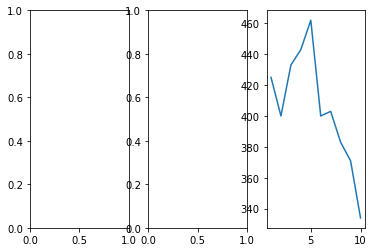

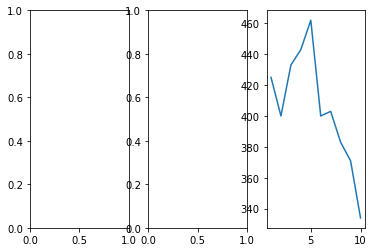

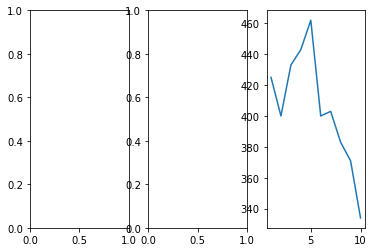

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
file2 = '/home/dsc/Documents/Data Science Challenge/searches.csv'
pd.set_option('display.max_columns', None)

all_chunks = pd.DataFrame()

dfchunk=pd.read_csv(file2,nrows = 300000,delimiter='^',chunksize=50000,iterator=True)

dest = {0:'MAD',1:'BCN',2:'APG'}
for key, value in dest.items():
    for i,b in enumerate(dfchunk):
        b['Date'] = pd.to_datetime(b['Date']) 
        b['Month']=b['Date'].dt.month
        filtered_df = b[b.Destination==(value)]
        result_chunk = filtered_df
        all_chunks = all_chunks.append(result_chunk)
    fig, axes = plt.subplots(nrows=1, ncols=3)
    city_filter = all_chunks.groupby(['Month'])['Destination'].count().reset_index()
    plt.plot(city_filter['Month'],city_filter['Destination'])
    
    


     
#best_columns = [x.replace(' ',"") for x in df4.columns]
#df['arr_port'] = df['arr_port'].str.replace(' ','')
#df4.columns = list(best_columns)
#df4['Date'] = pd.to_datetime(df4['Date'])
#df4['Month']=df4['Date'].dt.month
#df['Year']=df['Date'].dt.year




In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
figure,axeses = plt.subplots(2,2)

axeses[0,0].plot(X_2, Y_2)
axeses[0,1].scatter(X, Y_randomized)
#     axeses[0,1].plot(X2, Y2, c='blue')
axeses[1,0].plot(X_2, X_2 ** 2)
#        axeses[1,1].plot(X2, X2)

figure.set_size_inches(10,6)
axeses[0,0].legend(['Logistic Function'])